# Data Understanding and Preprocessing

## Setup

### Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive' , force_remount=True)


Mounted at /content/drive


### Libraries

In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import json



### Constants

In [3]:
ROOT_PATH = '/content/drive/MyDrive/generic-mix-topics-nlp'
DATA_PATH = os.path.join(ROOT_PATH, 'Data')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Data Loading

In [4]:
df = pd.read_parquet(os.path.join(DATA_PATH, 'GenericMixOfTopic.parquet'))
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,title,topic,topics_with_percentages,text
0,44579372,Julius Julskötare,Mixed,"b'{""Entertainment"":0.67,""Culture"":0.17,""Mass_m...",'Julius Julskötare' (&quot;Julius Christmas ...
1,69360653,Josia Topf,Mixed,"b'{""People"":0.5,""Sports"":0.5,""Academic_discipl...",Infobox athlete | name Josia Topf | fullname...
2,41642068,St. Peter Chaldean Catholic Cathedral (El Cajo...,Mixed,"b'{""Religion"":0.36,""Culture"":0.21,""Time"":0.14,...",St. Peter Cathedral is a Chaldean Catholic C...
3,4351257,Allahabad Address,Mixed,"b'{""History"":0.3,""Government"":0.2,""Philosophy""...","File:Iqbal.jpg|thumb|right| Muhammad Iqbal ,..."
4,648505,Glomerulus (olfaction),Academic_disciplines,"b'{""Academic_disciplines"":1.0,""Business"":0,""Co...",The glomerulus (plural glomeruli) is a spher...


In this step, we load the dataset that contains various records, each associated with specific attributes:

- **id**: A unique identifier for each record.
- **title**: A brief title that describes the content of the record.
- **topic**: Indicates the main topic associated with the record, such as "Mixed" or "Academic_disciplines."
- **topics_with_percentages**: Detailed information showing the percentage distribution of various topics related to the record.
- **text**: The main textual content of each record.

## Exploratory Data Analysis and Preprocessing

### Dataset Initial Overview

#### Column Types

In [ ]:
df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
id,object
title,object
topic,object
topics_with_percentages,object
text,object


All columns are currently recognized as "object" types, which means they contain text or mixed data.

#### Dataset Info

In [ ]:
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200005 entries, 0 to 200004
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   id                       200005 non-null  object
 1   title                    200005 non-null  object
 2   topic                    200005 non-null  object
 3   topics_with_percentages  200005 non-null  object
 4   text                     200005 non-null  object
dtypes: object(5)
memory usage: 7.6+ MB


This dataset contains a total of 200,005 records. Importantly, there are no missing values in any of these columns, ensuring that we have complete data for each record. The dataset occupies approximately 7.6 MB of memory.


### Topic Distribution and Analysis

In [ ]:
len(df['topic'].unique())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


40

In [ ]:
df['topic'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
topic,
Mixed,170000
Knowledge,825
Business,825
Politics,825
Military,825
Mass_media,825
History,825
Language,825
Engineering,825


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


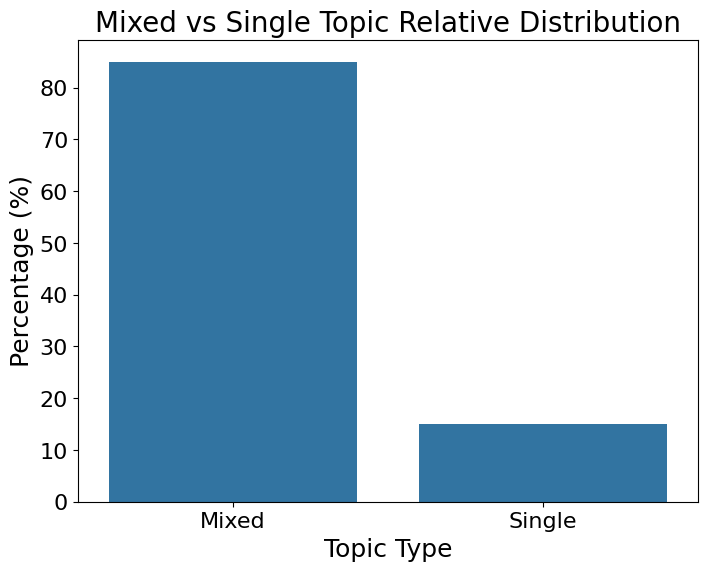

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crea un DataFrame temporaneo per classificare come 'Mixed' o 'Single'
temp_df = df.copy()
temp_df['topic_type'] = temp_df['topic'].apply(lambda x: 'Mixed' if 'Mixed' in x else 'Single')

# Calcola la distribuzione relativa tra 'Mixed' e 'Single'
topic_type_distribution = temp_df['topic_type'].value_counts(normalize=True) * 100

# Imposta la dimensione del font
font_size = 16
plt.rcParams.update({'font.size': font_size})

# Crea il grafico
plt.figure(figsize=(8, 6))
sns.barplot(x=topic_type_distribution.index, y=topic_type_distribution.values)

# Titolo e etichette
plt.title('Mixed vs Single Topic Relative Distribution', fontsize=font_size + 4)
plt.xlabel('Topic Type', fontsize=font_size + 2)
plt.ylabel('Percentage (%)', fontsize=font_size + 2)

# Mostra il grafico
plt.show()


The bar chart shows that the 'Mixed' topic overwhelmingly dominates the dataset, with the vast majority of records falling into this category. This indicates that most of the data points are associated with multiple topics rather than a single, distinct category. In contrast, the representation of other individual topics is significantly lower, suggesting a highly imbalanced distribution across the dataset.

As the next step, we will analyze the `topics_with_percentages` column to gain more detailed insights into the composition of the 'Mixed' topic and better understand how multiple topics are represented within these records.

### topics_with_percentages column analysis and processing

#### Convert JSON format and expand into separate columns

In [ ]:

# Function to process the JSON strings in the 'topics_with_percentages' column
def process_topics_column(row):
    return json.loads(row.decode('utf-8'))

# Apply the function to convert the JSON strings and expand into separate columns
topics_df = pd.json_normalize(df['topics_with_percentages'].apply(process_topics_column))

# Merge the new columns back to the original dataframe
df = pd.concat([df, topics_df], axis=1)

# Display the updated DataFrame
df.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,title,topic,topics_with_percentages,text,Entertainment,Culture,Mass_media,Academic_disciplines,Business,...,People,Philosophy,Politics,Religion,Science,Society,Sports,Technology,Time,Universe
0,44579372,Julius Julskötare,Mixed,"b'{""Entertainment"":0.67,""Culture"":0.17,""Mass_m...",'Julius Julskötare' (&quot;Julius Christmas ...,0.67,0.17,0.17,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0
1,69360653,Josia Topf,Mixed,"b'{""People"":0.5,""Sports"":0.5,""Academic_discipl...",Infobox athlete | name Josia Topf | fullname...,0.00,0.00,0.00,0.0,0.0,...,0.5,0.0,0.0,0.00,0.0,0.00,0.5,0.0,0.00,0.0
2,41642068,St. Peter Chaldean Catholic Cathedral (El Cajo...,Mixed,"b'{""Religion"":0.36,""Culture"":0.21,""Time"":0.14,...",St. Peter Cathedral is a Chaldean Catholic C...,0.00,0.21,0.00,0.0,0.0,...,0.0,0.0,0.0,0.36,0.0,0.12,0.0,0.0,0.14,0.0
3,4351257,Allahabad Address,Mixed,"b'{""History"":0.3,""Government"":0.2,""Philosophy""...","File:Iqbal.jpg|thumb|right| Muhammad Iqbal ,...",0.00,0.00,0.00,0.0,0.0,...,0.0,0.2,0.0,0.00,0.0,0.00,0.0,0.0,0.10,0.0
4,648505,Glomerulus (olfaction),Academic_disciplines,"b'{""Academic_disciplines"":1.0,""Business"":0,""Co...",The glomerulus (plural glomeruli) is a spher...,0.00,0.00,0.00,1.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0


In this step, we processed the detailed topic information stored in the `topics_with_percentages` column. Each record in this column originally contained a list of topics along with their corresponding percentages. We expanded this information into separate columns, one for each topic, with the associated percentage values.

By doing this, we can now analyze and interpret the contribution of each topic to the records individually. This expansion will help us better understand the composition of mixed topics and how different topics relate to each other across the dataset.

#### Identify threshold to label a topic

In [ ]:
# Group by 'topic' and calculate statistics for 'max_topic_percentage'
df['max_topic_percentage'] = df.drop(columns=['id', 'title', 'topic', 'topics_with_percentages', 'text']).max(axis=1)
grouped = df.groupby('topic')['max_topic_percentage'].describe()
grouped


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,mean,std,min,25%,50%,75%,max
topic,,,,,,,,
Academic_disciplines,825.0,1.000000,0.000000,1.00,1.0,1.0,1.00,1.00
Business,825.0,0.999539,0.006630,0.90,1.0,1.0,1.00,1.00
Communication,288.0,1.000000,0.000000,1.00,1.0,1.0,1.00,1.00
Concepts,825.0,0.999200,0.007795,0.90,1.0,1.0,1.00,1.00
Culture,825.0,0.999806,0.003937,0.92,1.0,1.0,1.00,1.00
Economy,825.0,0.999552,0.006493,0.90,1.0,1.0,1.00,1.00
Education,825.0,0.998315,0.012471,0.90,1.0,1.0,1.00,1.00
Energy,825.0,0.998933,0.009733,0.90,1.0,1.0,1.00,1.00
Engineering,825.0,0.999903,0.002785,0.92,1.0,1.0,1.00,1.00


In this step, we grouped the topics to analyze the distribution of the maximum percentage each topic contributes to a record. By examining these statistics, we aim to identify a threshold that distinguishes between when a record is predominantly associated with a single topic versus when it is considered "Mixed" — that is, associated with multiple topics. This analysis helps us determine the cutoff point at which a topic should be labeled as unique or as part of a mixed category.







/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


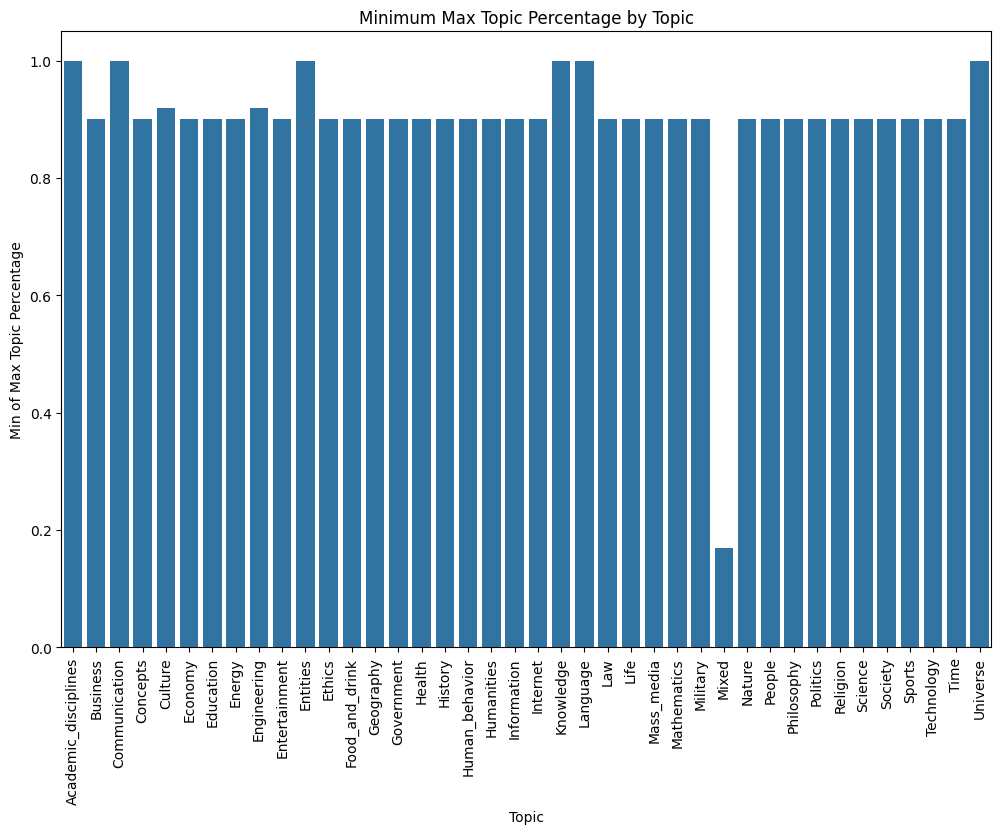

In [ ]:

# Extract the minimum values from the grouped statistics
min_values = grouped['min']

# Plot the minimum values using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=min_values.index, y=min_values.values)
plt.title('Minimum Max Topic Percentage by Topic')
plt.xlabel('Topic')
plt.ylabel('Min of Max Topic Percentage')
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.show()


The bar chart shows the minimum of the maximum topic percentages across all records for each topic. We can see that for topics labeled as a single topic (not "Mixed"), the dominant topic consistently occupies more than 90% of the text.

In contrast, the 'Mixed' category has a significantly lower minimum, indicating that no single topic dominates these records. From this analysis, we can establish that a threshold of 0.1 (or 10%) is appropriate for distinguishing between single-topic records and those that should be classified as "Mixed." If a topic covers more than 90% of the content, the record is likely to be associated with that single topic. Conversely, if no topic exceeds this threshold, the record falls into the "Mixed" category.

#### Define threshold and convert to binary values

In [ ]:
# Define the new threshold
threshold = 0.1

# Convert the percentage columns to binary values based on the new threshold
for column in df.columns[5:]:  # Partendo dalla sesta colonna (indice 5)
    df[column] = df[column].apply(lambda x: 1 if x >= threshold else 0)

# Display the updated DataFrame
df.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,title,topic,topics_with_percentages,text,Entertainment,Culture,Mass_media,Academic_disciplines,Business,...,Philosophy,Politics,Religion,Science,Society,Sports,Technology,Time,Universe,max_topic_percentage
0,44579372,Julius Julskötare,Mixed,"b'{""Entertainment"":0.67,""Culture"":0.17,""Mass_m...",'Julius Julskötare' (&quot;Julius Christmas ...,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,69360653,Josia Topf,Mixed,"b'{""People"":0.5,""Sports"":0.5,""Academic_discipl...",Infobox athlete | name Josia Topf | fullname...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,41642068,St. Peter Chaldean Catholic Cathedral (El Cajo...,Mixed,"b'{""Religion"":0.36,""Culture"":0.21,""Time"":0.14,...",St. Peter Cathedral is a Chaldean Catholic C...,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
3,4351257,Allahabad Address,Mixed,"b'{""History"":0.3,""Government"":0.2,""Philosophy""...","File:Iqbal.jpg|thumb|right| Muhammad Iqbal ,...",0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
4,648505,Glomerulus (olfaction),Academic_disciplines,"b'{""Academic_disciplines"":1.0,""Business"":0,""Co...",The glomerulus (plural glomeruli) is a spher...,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df["topics_with_percentages"][0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


b'{"Entertainment":0.67,"Culture":0.17,"Mass_media":0.17,"Academic_disciplines":0,"Business":0,"Communication":0,"Concepts":0,"Economy":0,"Education":0,"Energy":0,"Engineering":0,"Entities":0,"Ethics":0,"Food_and_drink":0,"Geography":0,"Government":0,"Health":0,"History":0,"Human_behavior":0,"Humanities":0,"Information":0,"Internet":0,"Knowledge":0,"Language":0,"Law":0,"Life":0,"Mathematics":0,"Military":0,"Nature":0,"People":0,"Philosophy":0,"Politics":0,"Religion":0,"Science":0,"Society":0,"Sports":0,"Technology":0,"Time":0,"Universe":0}'

With the identified threshold of 10% (0.1 on a scale from 0 to 1), we proceed to convert the topic values into binary format. Specifically, if a topic's value in a record is greater than 10%, it is converted to 1, indicating the presence of that topic in the record. Otherwise, it is converted to 0, indicating the topic's absence.

This binary representation will be essential for the next phase of multi-label modeling, where each record can be associated with multiple topics based on these binary indicators.

In [ ]:
df_cleaned = df.drop(columns=['id', 'title', 'topics_with_percentages', 'topic', 'max_topic_percentage'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Save first Checkpoint

In [ ]:
# Saving the processed dataset in Parquet format
processed_file_path = os.path.join(DATA_PATH, 'processed_generic_mix_of_topic.parquet')
df_cleaned.to_parquet(processed_file_path, index=False)

# Optionally, you can print the path to confirm
print(f"Processed dataset saved to: {processed_file_path}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Processed dataset saved to: /content/drive/MyDrive/generic-mix-topics-nlp/Data/processed_generic_mix_of_topic.parquet


In [6]:
df_cleaned = pd.read_parquet(os.path.join(DATA_PATH, 'processed_generic_mix_of_topic.parquet'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_cleaned.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,Entertainment,Culture,Mass_media,Academic_disciplines,Business,Communication,Concepts,Economy,Education,...,People,Philosophy,Politics,Religion,Science,Society,Sports,Technology,Time,Universe
0,'Julius Julskötare' (&quot;Julius Christmas ...,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Infobox athlete | name Josia Topf | fullname...,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,St. Peter Cathedral is a Chaldean Catholic C...,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
3,"File:Iqbal.jpg|thumb|right| Muhammad Iqbal ,...",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,The glomerulus (plural glomeruli) is a spher...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


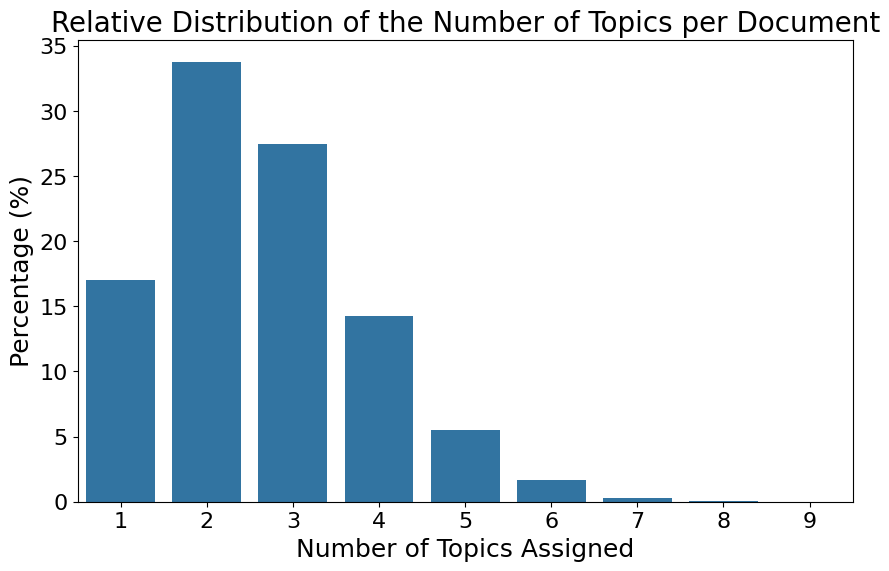

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calcola il numero di topics assegnati per ogni riga (escludendo la colonna 'text')
num_topics_per_row = df_cleaned.drop(columns=['text']).sum(axis=1)

# Crea un DataFrame per Seaborn
topics_df = pd.DataFrame({'num_topics': num_topics_per_row})

# Calcola la distribuzione relativa
relative_distribution = topics_df['num_topics'].value_counts(normalize=True) * 100
relative_distribution = relative_distribution.sort_index()  # Ordina per numero di topics

# Imposta la dimensione del font
font_size = 16
plt.rcParams.update({'font.size': font_size})

# Crea il grafico senza colorazione aggiuntiva (colore uniforme)
plt.figure(figsize=(10, 6))
sns.barplot(x=relative_distribution.index, y=relative_distribution.values)

# Titolo e etichette
plt.title('Relative Distribution of the Number of Topics per Document', fontsize=font_size + 4)
plt.xlabel('Number of Topics Assigned', fontsize=font_size + 2)
plt.ylabel('Percentage (%)', fontsize=font_size + 2)

# Mostra il grafico
plt.show()


### Topic Distribution after convertion

In [ ]:
topic_distribution = df_cleaned.drop(columns=['text']).sum()
topic_distribution

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Entertainment,35799
Culture,22873
Mass_media,32270
Academic_disciplines,7786
Business,13311
Communication,722
Concepts,2354
Economy,8327
Education,15178
Energy,2645


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


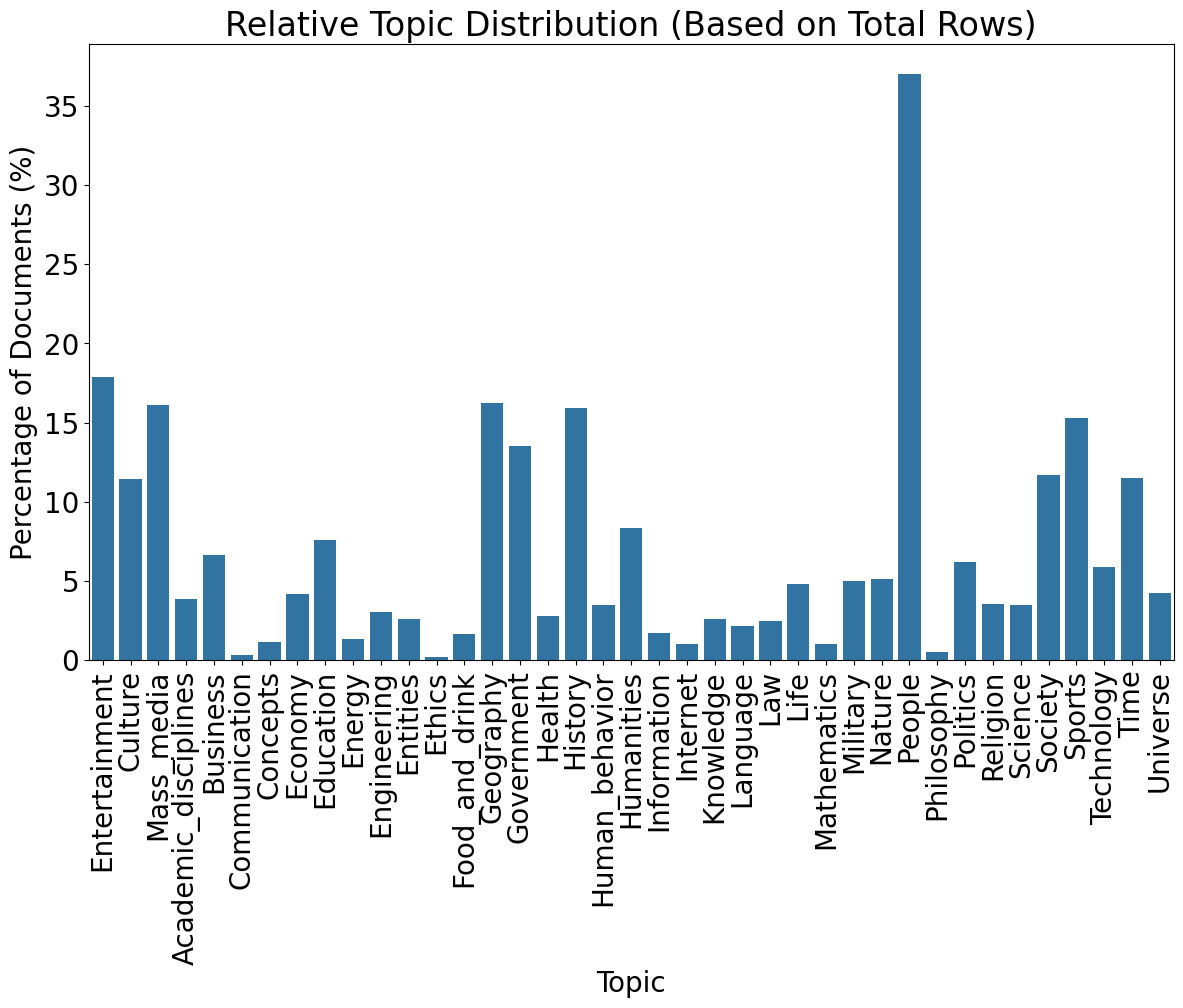

In [11]:
# Calcola il numero totale di righe
total_rows = len(df_cleaned)

# Calcola la distribuzione dei topics (somma di ogni colonna)
topic_distribution = df_cleaned.drop(columns=['text']).sum()

# Calcola la frequenza relativa rispetto al numero totale di righe
relative_topic_distribution_rows = (topic_distribution / total_rows) * 100

# Visualizza il grafico
plt.figure(figsize=(14, 8))
sns.barplot(x=relative_topic_distribution_rows.index, y=relative_topic_distribution_rows.values)
plt.title('Relative Topic Distribution (Based on Total Rows)')
plt.xlabel('Topic')
plt.ylabel('Percentage of Documents (%)')
plt.xticks(rotation=90)
plt.show()


his bar chart illustrates the distribution of topics after we converted the data into a binary format based on the 10% threshold.

#### Key Insights:
- **Dominant Topics**: We observe that certain topics, such as "People," "Entertainment," and "Geography," are highly dominant in the dataset, appearing in a large number of records. These topics will likely have a significant influence on any predictive models we develop.
  
- **Less Dominant Topics**: On the other hand, some topics like "Philosophy," "Ethics," and "Military" are far less prevalent. These topics may pose challenges during modeling due to their lower representation and might require special consideration to ensure they are accurately captured.

### Group Topics in macro group (for modeling purposes)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


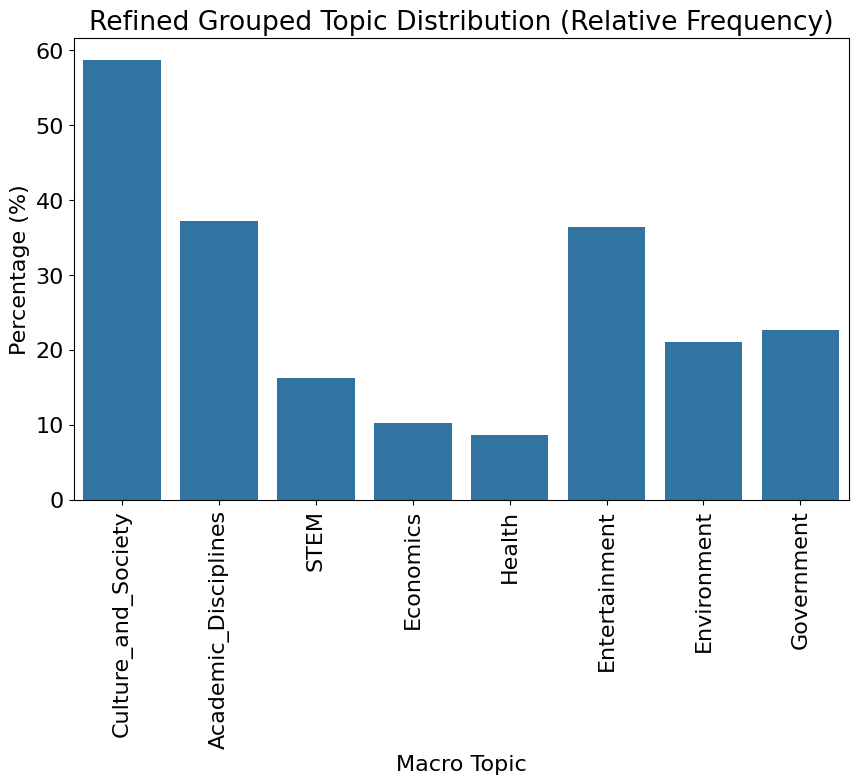

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create refined macro-topic columns with unique names
df_topic_grouped = df_cleaned[['text']].copy()

df_topic_grouped['Culture_and_Society'] = df_cleaned[['Culture', 'Society', 'Human_behavior', 'Religion', 'Philosophy', 'Ethics', 'People']].max(axis=1)
df_topic_grouped['Academic_Disciplines'] = df_cleaned[['Academic_disciplines', 'Humanities', 'History', 'Education', 'Language', 'Law', 'Concepts', 'Time']].max(axis=1)
df_topic_grouped['STEM'] = df_cleaned[['Mathematics', 'Technology', 'Science', 'Engineering', 'Internet', 'Information', 'Knowledge']].max(axis=1)
df_topic_grouped['Economics'] = df_cleaned[['Economy', 'Business', 'Communication']].max(axis=1)
df_topic_grouped['Health'] = df_cleaned[['Health', 'Food_and_drink', 'Life']].max(axis=1)
df_topic_grouped['Entertainment'] = df_cleaned[['Entertainment', 'Sports', 'Mass_media']].max(axis=1)
df_topic_grouped['Environment'] = df_cleaned[['Geography', 'Nature', 'Energy', 'Universe']].max(axis=1)
df_topic_grouped['Government'] = df_cleaned[['Government', 'Politics', 'Military', 'Entities']].max(axis=1)

# Calculate the distribution of the refined grouped topics with unique names
grouped_topic_distribution = df_topic_grouped.drop(columns=['text']).sum()

# Calculate relative frequency (percentage) based on total rows
total_rows = len(df_topic_grouped)
relative_grouped_topic_distribution = (grouped_topic_distribution / total_rows) * 100

# Imposta la dimensione del font
font_size = 16
plt.rcParams.update({'font.size': font_size})

# Plot the distribution with relative frequency using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=relative_grouped_topic_distribution.index, y=relative_grouped_topic_distribution.values)
plt.title('Refined Grouped Topic Distribution (Relative Frequency)')
plt.xlabel('Macro Topic')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90)
plt.show()


In this step, we have grouped the individual topics into broader macro topics. This is a strategic approach to simplify the dataset and address any potential challenges that may arise during the modeling phase. By creating these macro topics, we can analyze and model the data at a higher level of abstraction.

This approach serves as a backup plan in case the modeling of individual topics does not yield satisfactory results. If the models struggle to accurately predict or classify the finer, individual topics, we can instead focus on these more general macro topics, which may provide more robust and interpretable results.

The bar chart shows the distribution of these newly created macro topics.

- **Culture and Society** is the most prevalent macro topic, indicating that a significant portion of the dataset is focused on social and cultural issues.
- **Academic Disciplines** and **STEM** (Science, Technology, Engineering, and Mathematics) also have substantial representation, reflecting a strong presence of educational and technical content.
- Other macro topics like **Health**, **Entertainment**, and **Government** have moderate representation, while topics like **Economics** and **Environment** are less dominant but still significant.

This distribution provides us with a clearer understanding of the dataset's composition after grouping, allowing us to better plan the next steps in our analysis and modeling efforts.

### Analyze association between Topics

In [ ]:

# Considerare solo le colonne binarie dei topics
df_topics = df_cleaned.drop(columns=['text'])

# Applicare l'algoritmo Apriori per trovare gli insiemi frequenti
frequent_itemsets = apriori(df_topics, min_support=0.02, use_colnames=True)

# Ordinare gli insiemi frequenti per supporto (dal più frequente al meno frequente)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

# Trovare le regole di associazione tra i topics
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)

# Aggiungere il numero di osservazioni (supporto assoluto) in cui avviene la regola
rules['support_count'] = rules['support'] * len(df_topics)

# Ordinare le regole per lift (opzionale)
rules = rules.sort_values(by='lift', ascending=False)

rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,support_count
3,"(Entertainment, History)",(Time),0.027974,0.114907,0.024669,0.881859,7.674535,0.021455,7.491822,0.894728,4934.0
6,"(Mass_media, History)",(Time),0.023859,0.114907,0.020214,0.847234,7.373206,0.017473,5.793777,0.885501,4043.0
4,"(Time, Culture)",(History),0.023979,0.159156,0.021719,0.905755,5.690987,0.017903,8.921875,0.844535,4344.0
2,"(Entertainment, Time)",(History),0.027374,0.159156,0.024669,0.901187,5.662288,0.020313,8.509465,0.846567,4934.0
5,"(Mass_media, Time)",(History),0.022459,0.159156,0.020214,0.900045,5.655108,0.016640,8.412185,0.842081,4043.0
0,(Time),(History),0.114907,0.159156,0.095583,0.831825,5.226475,0.077294,4.999813,0.913652,19117.0
1,(Universe),(Geography),0.042669,0.162431,0.035904,0.841458,5.180403,0.028973,5.282937,0.842932,7181.0


In this step, we analyze the dataset to uncover any significant associations between topics. Using the Apriori algorithm, we identify frequent itemsets, which are combinations of topics that commonly appear together. We then apply association rules to these itemsets to understand the relationships between topics, including how strongly the presence of one topic might suggest the presence of another.

##### Key Findings:
- The rules generated highlight some interesting associations. For example, when "Entertainment" and "History" appear together, there is a strong likelihood that "Time" will also be present. This is indicated by a high confidence value and a substantial lift, suggesting a meaningful relationship between these topics.
- Another notable association is between "History" and "Mass Media," which also tends to co-occur with "Time." This might suggest a thematic overlap in the content, where discussions of history and media often reference time.
- The association between "Universe" and "Geography" is also prominent, which makes sense given the thematic connection between the topics.

These rules provide insights into how topics are interrelated within the dataset. Understanding these associations can inform how we structure our analysis and potentially guide feature engineering or model development in the next steps.

### Text Cleaning

In [ ]:
import re
from bs4 import BeautifulSoup
import pandas as pd
from multiprocessing import Pool

# Compilare le regex una sola volta per riutilizzarle
url_re = re.compile(r'http\S+|www.\S+')
special_char_re = re.compile(r'[^\w\s]')
disclaimer_re = re.compile(r'disclaimer.*', re.IGNORECASE)
signature_re = re.compile(r'sincerely,.*', re.IGNORECASE)

def clean_text(text):
    # Rimuovere HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Rimuovere URL e caratteri speciali
    text = url_re.sub('', text)
    text = special_char_re.sub('', text)

    # Convertire in minuscolo
    text = text.lower()

    # Rimuovere contenuti specifici come disclaimer o firme email
    text = disclaimer_re.sub('', text)
    text = signature_re.sub('', text)

    return text


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Scaricare risorse necessarie da NLTK (se non già fatto)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def normalize_text(text):
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import time
from tqdm.notebook import tqdm
import pandas as pd

# Necessario per abilitare tqdm con pandas
tqdm.pandas()

# Definizione della funzione di preprocessamento con timing per ogni step
def preprocess_text(text):
    # Step 1: Pulizia del testo
    text = clean_text(text)



    # Step 3: Normalizzazione
    text = normalize_text(text)


    return text

# Applicare la funzione di preprocessing con una progress bar
df_cleaned['preprocessed_text'] = df_cleaned['text'].progress_apply(preprocess_text)

# Visualizzare le prime righe del dataframe preprocessato
print(df_cleaned[['text', 'preprocessed_text']].head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/200005 [00:00<?, ?it/s]

<ipython-input-20-21101e1ea19a>:14: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


                                                text  \
0    'Julius Julskötare' (&quot;Julius Christmas ...   
1    Infobox athlete | name Josia Topf | fullname...   
2    St. Peter Cathedral is a Chaldean Catholic C...   
3    File:Iqbal.jpg|thumb|right| Muhammad Iqbal ,...   
4    The glomerulus (plural glomeruli) is a spher...   

                                   preprocessed_text  
0  julius julskötare julius christmas handler kal...  
1  infobox athlete name josia topf fullname josia...  
2  st peter cathedral chaldean catholic churchcha...  
3  fileiqbaljpgthumbright muhammad iqbal presiden...  
4  glomerulus plural glomerulus spherical structu...  


### Save Second Checkpoint

In [ ]:
df_cleaned.to_parquet(os.path.join(DATA_PATH, 'cleaned_dataset.parquet'), index=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
df_cleaned = pd.read_parquet(os.path.join(DATA_PATH, 'cleaned_dataset.parquet'))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Text Length Distribution

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


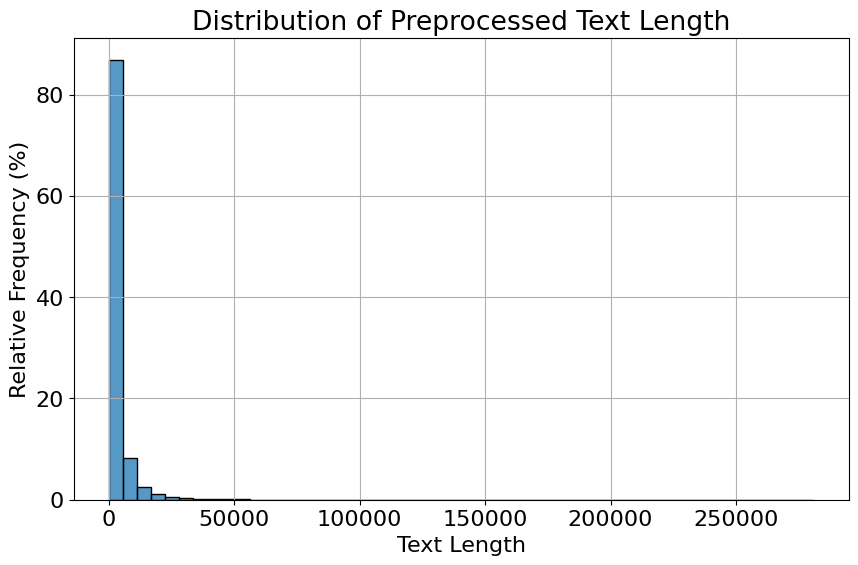

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the length of the preprocessed text
df_cleaned['text_length'] = df_cleaned['preprocessed_text'].apply(len)

# Create the plot using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['text_length'], bins=50, stat='percent')
plt.title('Distribution of Preprocessed Text Length')
plt.xlabel('Text Length')
plt.ylabel('Relative Frequency (%)')
plt.grid(True)

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


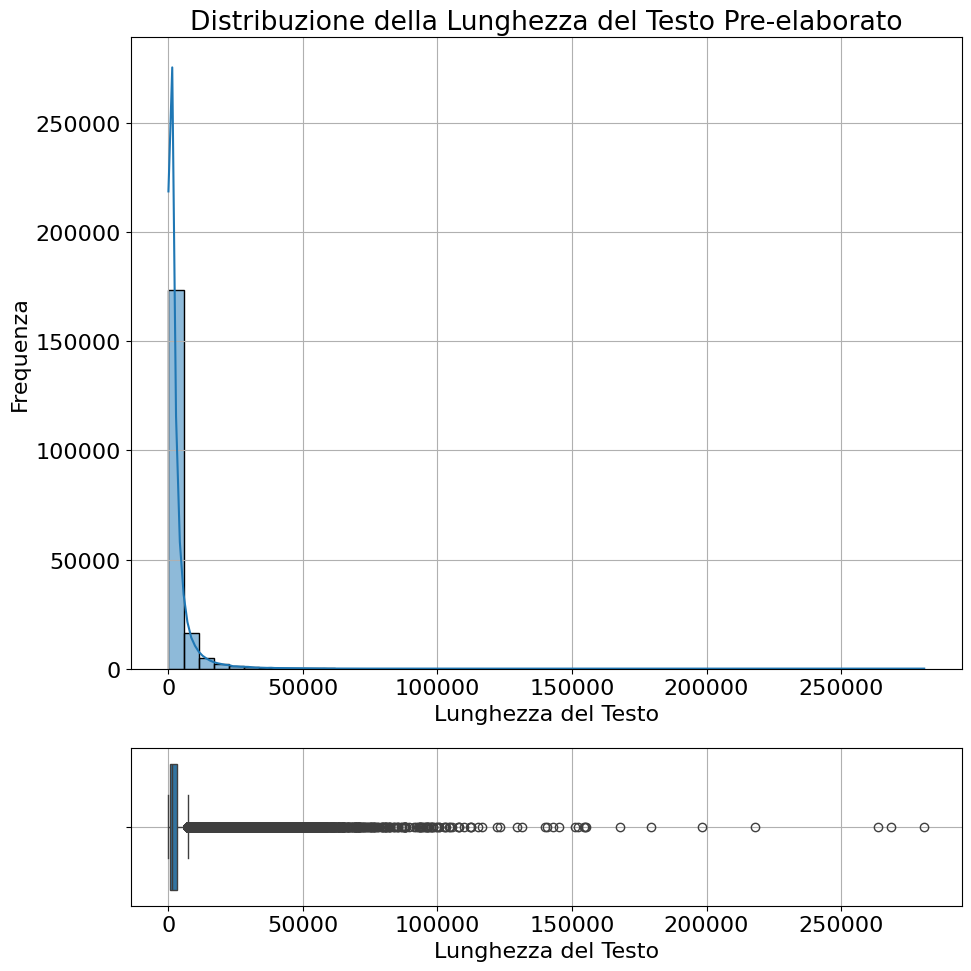

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcolare la lunghezza del testo pre-elaborato
df_cleaned['text_length'] = df_cleaned['preprocessed_text'].apply(len)

# Creare la figura e gli assi
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), gridspec_kw={'height_ratios': [4, 1]})

# Istogramma utilizzando Seaborn
sns.histplot(df_cleaned['text_length'], bins=50, kde=True, ax=axs[0])
axs[0].set_title('Distribuzione della Lunghezza del Testo Pre-elaborato')
axs[0].set_xlabel('Lunghezza del Testo')
axs[0].set_ylabel('Frequenza')
axs[0].grid(True)

# Boxplot della distribuzione della lunghezza del testo
sns.boxplot(x=df_cleaned['text_length'], ax=axs[1])
axs[1].set_xlabel('Lunghezza del Testo')
axs[1].grid(True)

# Mostrare il plot
plt.tight_layout()
plt.show()


In [ ]:
# Calcola i percentili ogni 5%
percentili = df_cleaned['text_length'].quantile([0.05 * i for i in range(1, 20)])

# Visualizza i percentili
percentili


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text_length
0.05,232.0
0.10,322.0
0.15,424.0
0.20,535.0
0.25,654.0
0.30,785.0
0.35,928.0
0.40,1088.0
0.45,1266.0
0.50,1465.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-27-ddd71c243d27>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
<ipython-input-27-ddd71c243d27>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)


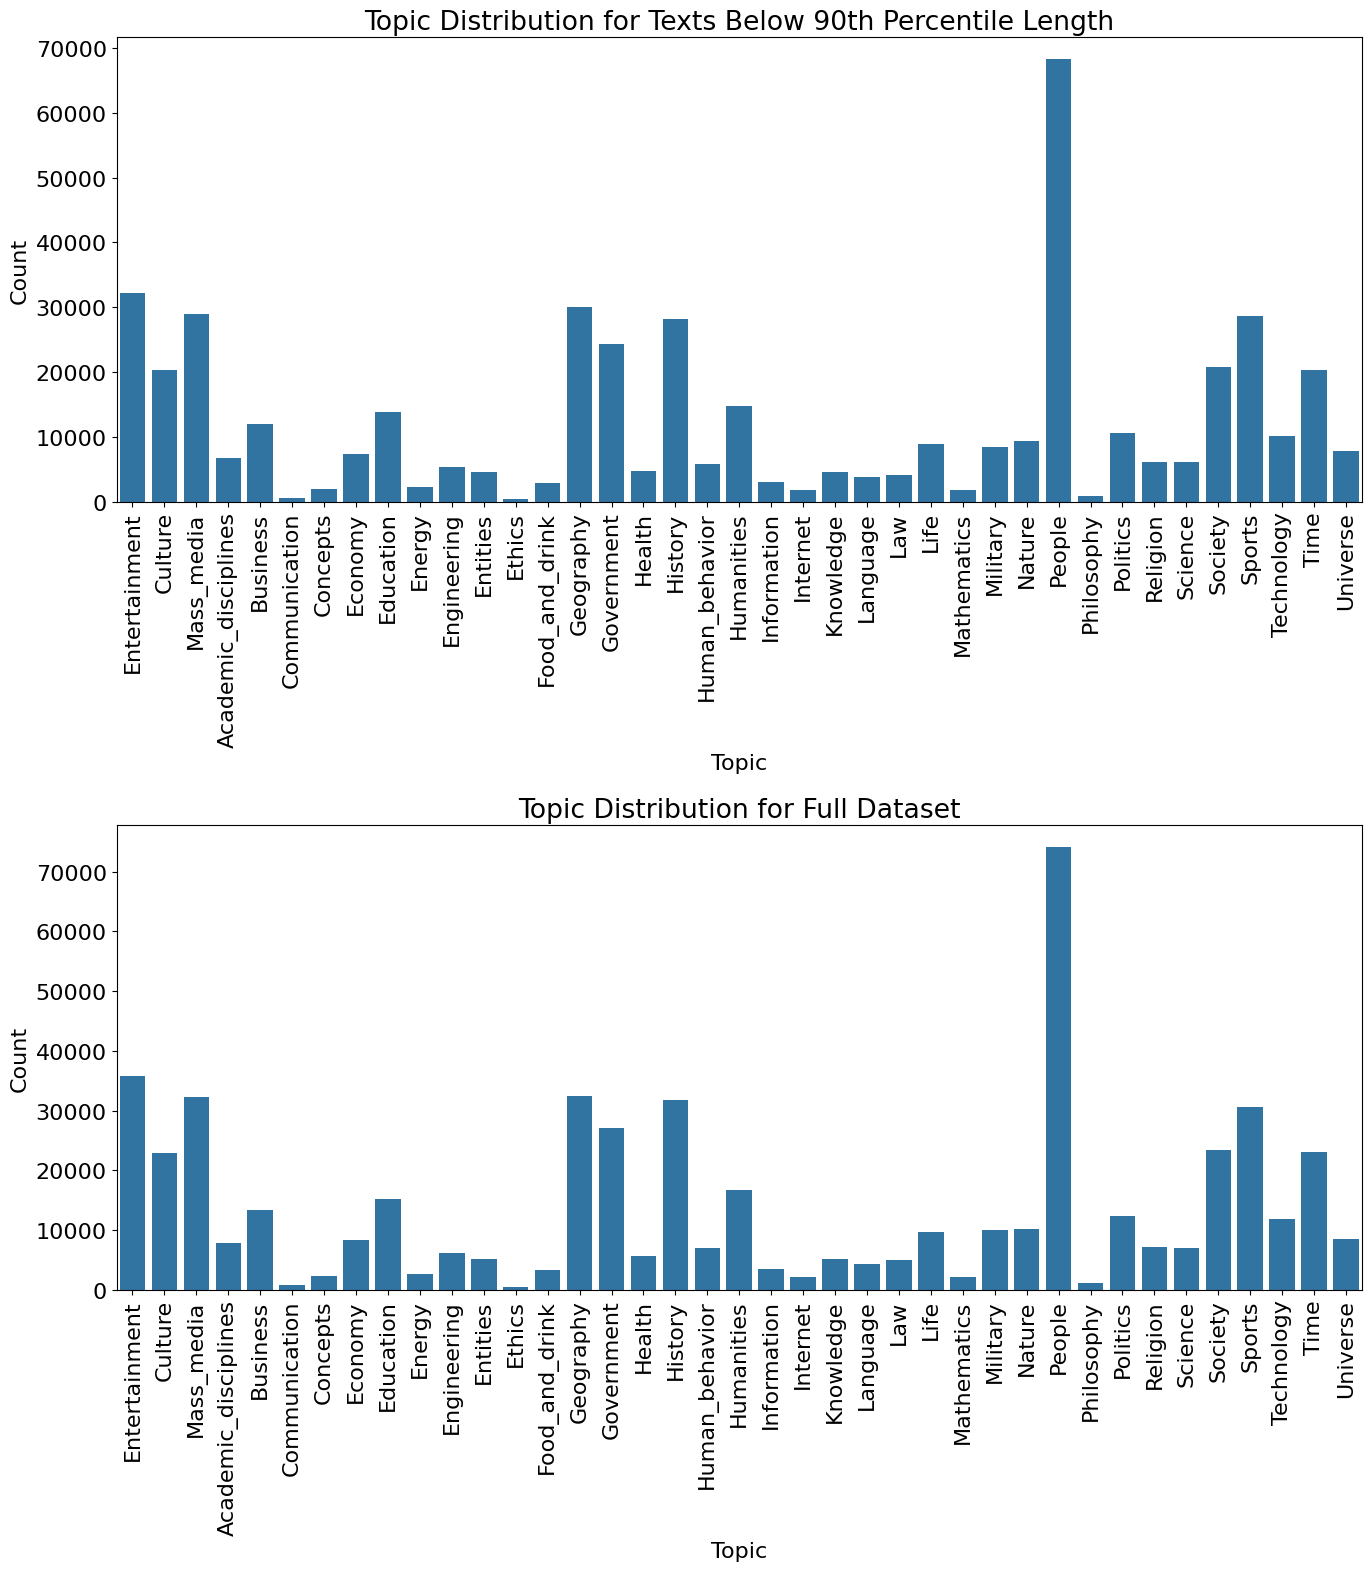

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calcolare il 90° percentile della lunghezza del testo
percentile_90 = np.percentile(df_cleaned['text_length'], 90)

# Filtrare le osservazioni con text_length superiore al 90° percentile
filtered_df = df_cleaned[df_cleaned['text_length'] < percentile_90]

# Calcolare la distribuzione delle label per le osservazioni filtrate
topic_distribution_filtered = filtered_df.drop(columns=['text', 'preprocessed_text', 'text_length']).sum()

# Calcolare la distribuzione delle label per l'intero dataset
topic_distribution_full = df_cleaned.drop(columns=['text', 'preprocessed_text', 'text_length']).sum()

# Creare la figura e gli assi
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 16))

# Visualizzare la distribuzione del dataset filtrato con un bar plot
sns.barplot(x=topic_distribution_filtered.index, y=topic_distribution_filtered.values, ax=axs[0])
axs[0].set_title('Topic Distribution for Texts Below 90th Percentile Length')
axs[0].set_xlabel('Topic')
axs[0].set_ylabel('Count')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)

# Visualizzare la distribuzione del dataset completo con un bar plot
sns.barplot(x=topic_distribution_full.index, y=topic_distribution_full.values, ax=axs[1])
axs[1].set_title('Topic Distribution for Full Dataset')
axs[1].set_xlabel('Topic')
axs[1].set_ylabel('Count')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)

# Mostrare il plot
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-34-73e493c9aee4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_2['text_length'] = filtered_df_2['preprocessed_text'].apply(len)


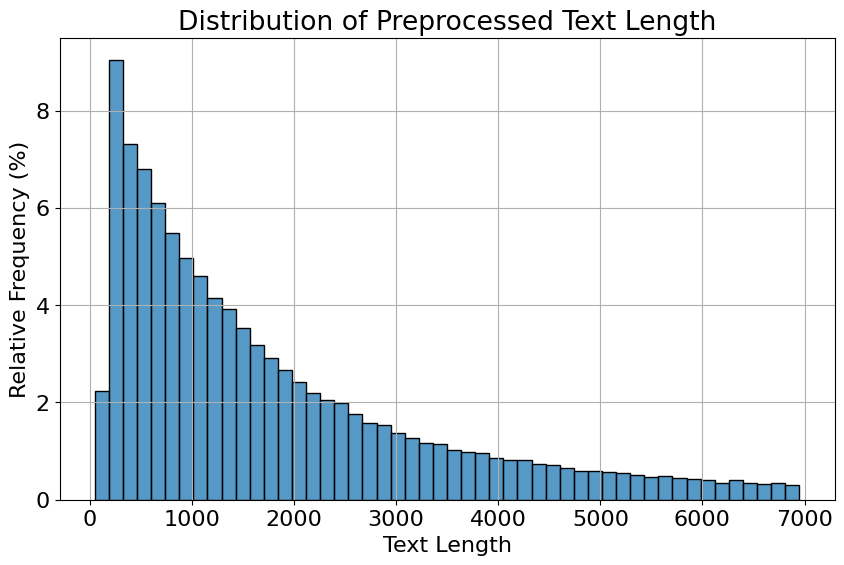

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcolare la lunghezza del testo pre-elaborato per le righe filtrate
filtered_df_2 = df_cleaned[df_cleaned['text_length'] < percentile_90]
filtered_df_2['text_length'] = filtered_df_2['preprocessed_text'].apply(len)

# Calcolare il numero totale di righe filtrate
total_rows = len(filtered_df_2)

# Creare l'histplot utilizzando Seaborn con la frequenza relativa
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df_2['text_length'], bins=50, stat='percent')
plt.title('Distribution of Preprocessed Text Length')
plt.xlabel('Text Length')
plt.ylabel('Relative Frequency (%)')
plt.grid(True)

# Mostrare il plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-25-6d9111391e3d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_2['text_length'] = filtered_df_2['preprocessed_text'].apply(len)


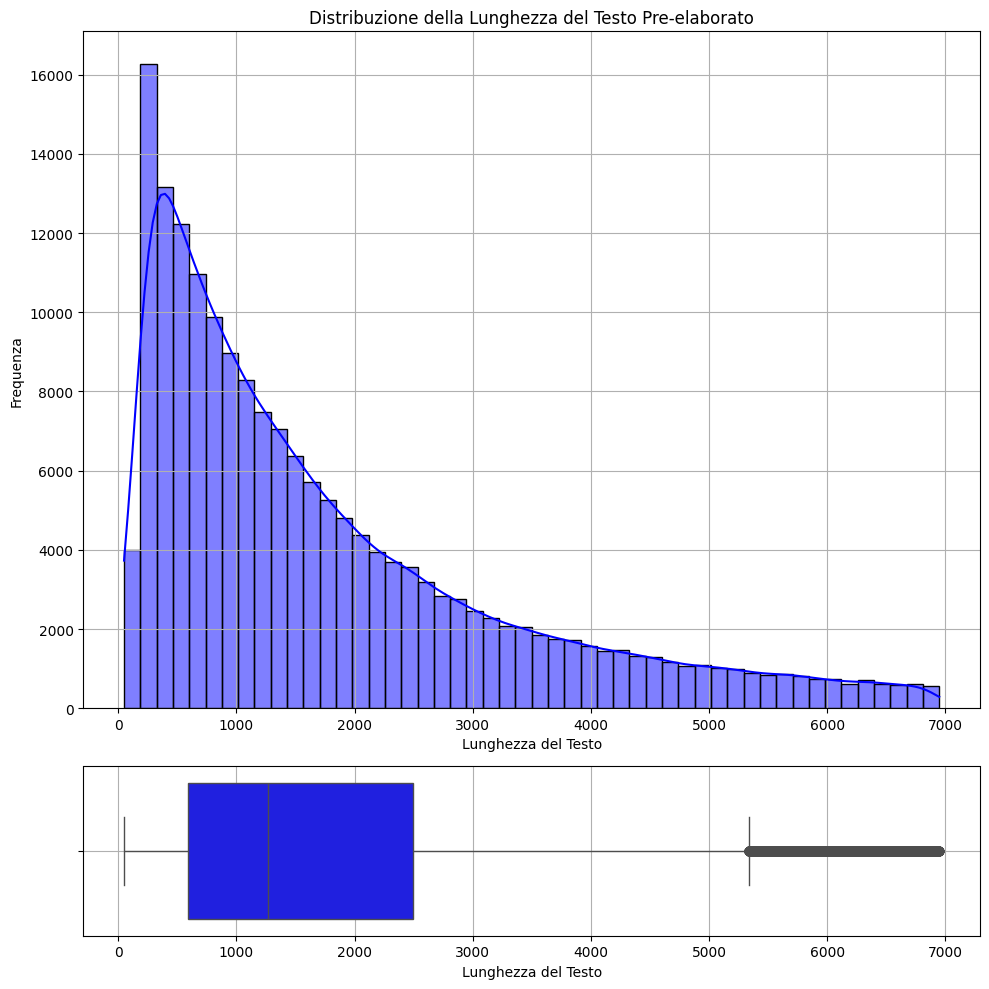

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcolare la lunghezza del testo pre-elaborato
filtered_df_2 = df_cleaned[df_cleaned['text_length'] < percentile_90]

filtered_df_2['text_length'] = filtered_df_2['preprocessed_text'].apply(len)

# Creare la figura e gli assi
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), gridspec_kw={'height_ratios': [4, 1]})

# Istogramma utilizzando Seaborn
sns.histplot(filtered_df_2['text_length'], bins=50, kde=True, color='blue', ax=axs[0])
axs[0].set_title('Distribuzione della Lunghezza del Testo Pre-elaborato')
axs[0].set_xlabel('Lunghezza del Testo')
axs[0].set_ylabel('Frequenza')
axs[0].grid(True)

# Boxplot della distribuzione della lunghezza del testo
sns.boxplot(x=filtered_df_2['text_length'], color='blue', ax=axs[1])
axs[1].set_xlabel('Lunghezza del Testo')
axs[1].grid(True)

# Mostrare il plot
plt.tight_layout()
plt.show()


In [ ]:
filtered_df = filtered_df.drop(columns = ['text','text_length'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Entertainment,Culture,Mass_media,Academic_disciplines,Business,Communication,Concepts,Economy,Education,Energy,...,Philosophy,Politics,Religion,Science,Society,Sports,Technology,Time,Universe,preprocessed_text
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,julius julskötare julius christmas handler kal...
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,infobox athlete name josia topf fullname josia...
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,st peter cathedral chaldean catholic churchcha...
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,glomerulus plural glomerulus spherical structu...
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,reference manitoba language right 1985 1 scr 7...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,nasmyth telescope also called nasmythcassegrai...
200000,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,gerhard müllerhornbach born 26 february 1951 g...
200002,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,liberation front andalusia spanish languagespa...
200003,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,vladislav vasilyevich lisovets born august 9 1...


### Save Third Checkpoint

In [ ]:
filtered_df.to_parquet(os.path.join(DATA_PATH, 'cleaned_dataset_no_outliers.parquet'), index=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
